<a href="https://colab.research.google.com/github/AndreiAf02/Job-Satisfaction/blob/main/Job_Satisfaction_AT_Seniority.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install semopy

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import semopy
import math
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

## Data Preprocessing:

In [3]:
# path_to_data = 'https://raw.githubusercontent.com/EduardoAve/Labour-well-being/refs/heads/main/data/02_processed/'
path_to_data2 = 'https://raw.githubusercontent.com/EduardoAve/Labour-well-being/refs/heads/main/data/01_raw-00/'

In [4]:
data_total = pd.read_csv(path_to_data2+ "Final_Dataset.csv", sep=",", header=0)
data_total.columns = data_total.columns.str.replace(".","")
data_total

,Country,Version,1 Gender:,2 Age (in years):,Unnamed: 4,3 Nationality:,4 Current marital (partnership) status:,5 Do you currently care for underage children or dependent relatives?,6 The type of higher education insitution where you primarily work:,7 Subject area of the faculty (higher education institution) where you primarily work:,...,36 I tend to overwork,37 I don’t consider my work to be finished until I am completely satisfied with the result,38 My thoughts revolve around work almost exclusively,"39 When I’m unsuccessful at work, it makes me feel very down","40 If I don’t succeed at something, that just makes me all the more determined",41 I can be calm and collected in almost all situations,42 My life up till now has been characterized by professional success,"43 By and large, I am happy and content",44 I have the full support of my family,Vulnerability
0,2,4,2.0,28.0,2.0,Spanish,3.0,1.0,1.0,1.0,...,4.0,4.0,3.0,4.0,1.0,4.0,1.0,3.0,5.0,4.0
1,2,4,1.0,33.0,2.0,German,2.0,1.0,1.0,3.0,...,5.0,5.0,4.0,4.0,3.0,3.0,2.0,2.0,5.0,4.0
2,2,4,2.0,32.0,2.0,Kosovan,3.0,1.0,NaN,5.0,...,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,5.0,3.0
3,2,4,NaN,30.0,2.0,Spain,2.0,1.0,1.0,5.0,...,4.0,5.0,1.0,5.0,2.0,4.0,2.0,3.0,3.0,4.0
4,2,4,1.0,39.0,2.0,Italian,2.0,2.0,1.0,5.0,...,5.0,5.0,3.0,3.0,3.0,2.0,4.0,4.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,1,1,1.0,27.0,4.0,NaN,2.0,1.0,4.0,1.0,...,2.0,4.0,2.0,3.0,2.0,3.0,4.0,3.0,4.0,2.0
2743,1,1,1.0,80.0,3.0,NaN,1.0,1.0,4.0,6.0,...,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN
2744,1,1,2.0,27.0,6.0,NaN,3.0,1.0,4.0,3.0,...,2.0,3.0,1.0,1.0,3.0,3.0,5.0,5.0,3.0,2.0
2745,1,1,2.0,28.0,4.0,NaN,3.0,1.0,4.0,1.0,...,5.0,4.0,4.0,4.0,3.0,3.0,3.0,1.0,4.0,NaN


In [5]:
print(data_total.columns.tolist())

['Country', 'Version', '1 Gender:', '2 Age (in years):', 'Unnamed: 4', '3 Nationality:', '4 Current marital (partnership) status:', '5 Do you currently care for underage children or dependent relatives?', '6 The type of higher education insitution where you primarily work:', '7 Subject area of the faculty (higher education institution) where you primarily work:', '8 Duration of your current employment contract at the higher education institution where you primarily work:', '9 Extent of employment in higher education (in hours/week, aggregated for all higher education institutions where you work):', '10 Actual average weekly working hours in higher education (in a typical semester week):', 'Effort (less, more, equal)', 'Effort [%]', 'Income CZK', 'Income EURO', 'Euro Adj', 'Salary/hour', 'Salary effort/hour', '12 Do you hold a leadership position at a higher education institution?', '13 How influential are you in helping to shape key academic policies at your institution at the level of

In [6]:
data_at_total = data_total[data_total['Country']==1].reset_index(drop=True)
# data_cz_total = data_total[data_total['Country']==2].reset_index(drop=True)
data_at_total

,Country,Version,1 Gender:,2 Age (in years):,Unnamed: 4,3 Nationality:,4 Current marital (partnership) status:,5 Do you currently care for underage children or dependent relatives?,6 The type of higher education insitution where you primarily work:,7 Subject area of the faculty (higher education institution) where you primarily work:,...,36 I tend to overwork,37 I don’t consider my work to be finished until I am completely satisfied with the result,38 My thoughts revolve around work almost exclusively,"39 When I’m unsuccessful at work, it makes me feel very down","40 If I don’t succeed at something, that just makes me all the more determined",41 I can be calm and collected in almost all situations,42 My life up till now has been characterized by professional success,"43 By and large, I am happy and content",44 I have the full support of my family,Vulnerability
0,1,3,1.0,47.0,7.0,Hungary,1.0,2.0,5.0,5.0,...,4.0,2.0,3.0,3.0,3.0,4.0,5.0,5.0,5.0,3.0
1,1,3,2.0,35.0,NaN,NaN,1.0,2.0,6.0,2.0,...,4.0,4.0,4.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0
2,1,3,1.0,51.0,7.0,Australian,3.0,1.0,4.0,5.0,...,4.0,2.0,4.0,5.0,2.0,5.0,3.0,4.0,4.0,4.0
3,1,3,1.0,34.0,7.0,Belgian,2.0,1.0,4.0,7.0,...,2.0,4.0,1.0,4.0,3.0,3.0,4.0,4.0,4.0,4.0
4,1,3,2.0,29.0,7.0,Ecuadorian,2.0,1.0,4.0,2.0,...,4.0,4.0,1.0,4.0,4.0,3.0,4.0,4.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,1,1,1.0,27.0,4.0,NaN,2.0,1.0,4.0,1.0,...,2.0,4.0,2.0,3.0,2.0,3.0,4.0,3.0,4.0,2.0
1324,1,1,1.0,80.0,3.0,NaN,1.0,1.0,4.0,6.0,...,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN
1325,1,1,2.0,27.0,6.0,NaN,3.0,1.0,4.0,3.0,...,2.0,3.0,1.0,1.0,3.0,3.0,5.0,5.0,3.0,2.0
1326,1,1,2.0,28.0,4.0,NaN,3.0,1.0,4.0,1.0,...,5.0,4.0,4.0,4.0,3.0,3.0,3.0,1.0,4.0,NaN


In [7]:
data_at_job = data_at_total[['2 Age (in years):',
    'AT_15 Your current position at the higher education institution, where you primarily work: ', ## Current Position
    'Salary/hour',
    '8 Duration of your current employment contract at the higher education institution where you primarily work:', ## Contract Duration
    '10 Actual average weekly working hours in higher education (in a typical semester week):', ## Actual Weekly Working Hours
    'Effort [%]', ## Effort = actual hours/contract hours
    '1 Teaching (classroom instruction, preparation of instructional materials and lesson plans, advising students, reading and evaluating student work, examination management, etc)', ## Teaching hours
    '2 Research (reading literature, designing and conducting experiments, collecting and analysing data, writing articles or other scientific texts, etc)', ## Research Hours
    '3 Activities related to externally funded research projects (searching for information on available funding sources, preparation of grant applications and project reports, project management and administration, etc)', ## Research Admin hours
    '4 Organisational and administrative activities (organising and attending meetings, dealing with tasks and documents not directly related to teaching, research, or externally funded research projects, etc)', ## General Admin hours
    '12 Do you hold a leadership position at a higher education institution?', ## Leadership position
    '13 How influential are you in helping to shape key academic policies at your institution at the level of department or similar unit?', ## Policy Influence
    ## ACADEMIC RESOURCES:
    '1 Facilities and technological equipment (offices, classrooms, laboratories, computers, projectors, teaching software)', ## Academic Resources - FACILITIES
    '2 Research equipment (instruments, tools, materials, software for working with data)', ## Academic Resources - RESEARCH EQUIP
    '3 Availability of scientific literature (access to up-to-date scientific articles and books)', ## Academic Resources - LITERATURE
    '4 Personnel support (support from secretarial, administrative and technical staff, laboratory technicians, etc)', ## Academic Resources - SUPPORT
    '5 Opportunities for personal and professional development (offer and availability of professional courses and internships, opportunities to participate at conferences and other professional events)', ## Academic Resources - PD
    '6 Availability of resources for research funding', ## Academic Resources - FUNDING
    ## PERFORMANCE PRESSURE:
    '1 At my institution, there is a strong performance orientation',
    ## PERCEIVED AUTONOMY:
    '2 I feel like I can be myself at my job', ## KEEP ORDER
    "3 At work, I often feel like I have to follow other people’s commands", ## TO INVERT
    '4 If I could choose, I would do things at work differently', ## TO INVERT
    '5 The tasks I have to do at work are in line with what I really want to do', ## KEEP ORDER
    '6 I feel free to do my job the way I think it could best be done', ## KEEP ORDER
    '7 In my job, I feel forced to do things I do not want to do ', ## TO INVERT
    ## QUALITY OF LEADERSHIP:
    '1  makes sure that the members of staff have good development opportunities', ## KEEP ORDER
    '2  gives high priority to job satisfaction', ## KEEP ORDER
    '3  is good at work planning', ## KEEP ORDER
    '4  is good at solving conflicts ', ## KEEP ORDER
    ## SENSE OF COMMUNITY:
    '1 There is a good atmosphere between myself and my colleagues ',
    '2 There is good co-operation between the colleagues at work',
    '3 I feel part of a community at my place of work',
    ## JOB SATISFACTION:
    '1  your work prospects? ',
    '2   the physical working conditions (eg facilities, equipment, physical working environment)?',
    '3  the way your abilities are used?',
    '4  your salary?',
    '5  your job as a whole, everything taken into consideration? '
]]

In [8]:
data_at_job.columns.tolist()

['2 Age (in years):',
 'AT_15 Your current position at the higher education institution, where you primarily work: ',
 'Salary/hour',
 '8 Duration of your current employment contract at the higher education institution where you primarily work:',
 '10 Actual average weekly working hours in higher education (in a typical semester week):',
 'Effort [%]',
 '1 Teaching (classroom instruction, preparation of instructional materials and lesson plans, advising students, reading and evaluating student work, examination management, etc)',
 '2 Research (reading literature, designing and conducting experiments, collecting and analysing data, writing articles or other scientific texts, etc)',
 '3 Activities related to externally funded research projects (searching for information on available funding sources, preparation of grant applications and project reports, project management and administration, etc)',
 '4 Organisational and administrative activities (organising and attending meetings, deali

In [9]:
data_at_job.columns = ['Age',
    'Current_position', ## Current Position
    'Salary',
    'Contract_duration', ## Contract Duration
    'Actual_hrs', ## Actual Weekly Working Hours
    'Effort', ## Effort = actual hours/contract hours
    'Teaching_hrs', ## Teaching hours
    'Research_hrs', ## Research Hours
    'External_funding_hrs', ## External Research Funding hours
    'Admin_hrs', ## General Admin hours
    'Leadership_position', ## Leadership position
    'Policy_influence', ## Policy Influence
    ## ACADEMIC RESOURCES:
    'Acad_res_facility', ## Academic Resources - FACILITIES
    'Acad_res_equip', ## Academic Resources - RESEARCH EQUIP
    'Acad_res_lit', ## Academic Resources - LITERATURE
    'Acad_res_support', ## Academic Resources - SUPPORT
    'Acad_res_PD', ## Academic Resources - PD
    'Acad_res_funding', ## Academic Resources - FUNDING
    ## PERFORMANCE PRESSURE:
    'Performance_pressure',
    ## PERCEIVED AUTONOMY:
    'Be_myself', ## KEEP ORDER
    "Follow_commands", ## TO INVERT
    'Do_differently', ## TO INVERT
    'Want_to_do', ## KEEP ORDER
    'Done_best', ## KEEP ORDER
    'Forced_to_do', ## TO INVERT
    ## QUALITY OF LEADERSHIP:
    'Development_opportunities', ## KEEP ORDER
    'Prioritizes_satisfaction', ## KEEP ORDER
    'Work_planning', ## KEEP ORDER
    'Solving_conflicts', ## KEEP ORDER
    ## SENSE OF COMMUNITY:
    'Good_atmosphere',
    'Good_cooperation',
    'Part_of_community',
    ## JOB SATISFACTION:
    'Work_prospects',
    'Physical_working_conditions',
    'Use_of_abilities',
    'Satisfaction_w_salary',
    'Overall_satisfaction']

In [10]:
data_at_job.columns.tolist()

['Age',
 'Current_position',
 'Salary',
 'Contract_duration',
 'Actual_hrs',
 'Effort',
 'Teaching_hrs',
 'Research_hrs',
 'External_funding_hrs',
 'Admin_hrs',
 'Leadership_position',
 'Policy_influence',
 'Acad_res_facility',
 'Acad_res_equip',
 'Acad_res_lit',
 'Acad_res_support',
 'Acad_res_PD',
 'Acad_res_funding',
 'Performance_pressure',
 'Be_myself',
 'Follow_commands',
 'Do_differently',
 'Want_to_do',
 'Done_best',
 'Forced_to_do',
 'Development_opportunities',
 'Prioritizes_satisfaction',
 'Work_planning',
 'Solving_conflicts',
 'Good_atmosphere',
 'Good_cooperation',
 'Part_of_community',
 'Work_prospects',
 'Physical_working_conditions',
 'Use_of_abilities',
 'Satisfaction_w_salary',
 'Overall_satisfaction']

In [11]:
data_at_job = data_at_job.dropna(subset=['Age', 'Current_position', 'Leadership_position']).reset_index(drop=True)
data_at_job = data_at_job[~(data_at_job == '#VALUE!').any(axis=1)]
for col in data_at_job.columns:
  data_at_job[col] = data_at_job[col].astype(str).str.replace(',', '.').astype(float)
data_at_job.to_csv('data_at_job.csv')
data_at_job

,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,...,Work_planning,Solving_conflicts,Good_atmosphere,Good_cooperation,Part_of_community,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,47.0,2.0,86.538462,6.0,40.0,100.000000,12.0,6.0,6.0,16.0,...,3.0,3.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0
1,35.0,8.0,22.788462,3.0,45.0,112.500000,NaN,35.0,10.0,NaN,...,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0
2,51.0,13.0,20.192308,3.0,40.0,100.000000,0.0,10.0,10.0,80.0,...,2.0,2.0,5.0,3.0,2.0,4.0,3.0,1.0,1.0,2.0
3,34.0,8.0,17.884615,3.0,50.0,125.000000,15.0,30.0,2.0,5.0,...,4.0,4.0,4.0,4.0,4.0,2.0,5.0,4.0,4.0,4.0
4,29.0,11.0,26.373626,3.0,35.0,100.000000,1.0,20.0,9.0,5.0,...,4.0,2.0,4.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,27.0,9.0,18.907500,3.0,35.0,116.666667,0.0,25.0,1.0,4.0,...,2.0,1.0,3.0,1.0,2.0,4.0,4.0,2.0,1.0,2.0
1300,80.0,13.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,3.0,3.0
1301,27.0,9.0,22.061538,3.0,30.0,100.000000,0.0,25.0,0.0,5.0,...,3.0,4.0,5.0,4.0,4.0,2.0,2.0,4.0,3.0,4.0
1302,28.0,9.0,13.461538,3.0,42.0,116.666667,2.0,40.0,0.0,0.0,...,1.0,2.0,3.0,3.0,3.0,1.0,2.0,2.0,1.0,2.0


In [12]:
np.sort(data_at_job['Current_position'].unique())

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.])

In [13]:
data_at_job

,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,...,Work_planning,Solving_conflicts,Good_atmosphere,Good_cooperation,Part_of_community,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,47.0,2.0,86.538462,6.0,40.0,100.000000,12.0,6.0,6.0,16.0,...,3.0,3.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0
1,35.0,8.0,22.788462,3.0,45.0,112.500000,NaN,35.0,10.0,NaN,...,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0
2,51.0,13.0,20.192308,3.0,40.0,100.000000,0.0,10.0,10.0,80.0,...,2.0,2.0,5.0,3.0,2.0,4.0,3.0,1.0,1.0,2.0
3,34.0,8.0,17.884615,3.0,50.0,125.000000,15.0,30.0,2.0,5.0,...,4.0,4.0,4.0,4.0,4.0,2.0,5.0,4.0,4.0,4.0
4,29.0,11.0,26.373626,3.0,35.0,100.000000,1.0,20.0,9.0,5.0,...,4.0,2.0,4.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,27.0,9.0,18.907500,3.0,35.0,116.666667,0.0,25.0,1.0,4.0,...,2.0,1.0,3.0,1.0,2.0,4.0,4.0,2.0,1.0,2.0
1300,80.0,13.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,3.0,3.0
1301,27.0,9.0,22.061538,3.0,30.0,100.000000,0.0,25.0,0.0,5.0,...,3.0,4.0,5.0,4.0,4.0,2.0,2.0,4.0,3.0,4.0
1302,28.0,9.0,13.461538,3.0,42.0,116.666667,2.0,40.0,0.0,0.0,...,1.0,2.0,3.0,3.0,3.0,1.0,2.0,2.0,1.0,2.0


In [14]:
## Interpolating the missing answer data using averages from each job position:
data_at_job_interpolated = data_at_job
data_at_job_interpolated.columns

for i in range(len(data_at_job_interpolated.columns)-3):
  for j in np.sort(data_at_job_interpolated['Current_position'].unique()):
    interpolation = data_at_job_interpolated[data_at_job_interpolated.columns[i+2]][data_at_job_interpolated['Current_position']== j].mean()
    print('Interpolated Value:', interpolation)
    data_at_job_interpolated[data_at_job_interpolated.columns[i+2]][(data_at_job_interpolated[data_at_job_interpolated.columns[i+2]].isna())
    & (data_at_job_interpolated['Current_position']== j)] = interpolation

data_at_job_interpolated.to_csv('data_at_job_interpolated.csv')
data_at_job_interpolated



Interpolated Value: 32.66186321156931
Interpolated Value: 106.43888510797046
Interpolated Value: 51.52034987512487
Interpolated Value: 92.51695900253594
Interpolated Value: 84.30458579881656
Interpolated Value: 49.19045875999001
Interpolated Value: 73.5480698005698
Interpolated Value: 48.21161777089524
Interpolated Value: 33.808428957649944
Interpolated Value: 37.36983237973152
Interpolated Value: 31.84670231424676
Interpolated Value: 42.46080091138762
Interpolated Value: 40.323063787065486
Interpolated Value: 1.4198473282442747
Interpolated Value: 2.4215686274509802
Interpolated Value: 1.4782608695652173
Interpolated Value: 2.0140845070422535
Interpolated Value: 4.064516129032258
Interpolated Value: 1.564102564102564
Interpolated Value: 2.891304347826087
Interpolated Value: 2.5369127516778525
Interpolated Value: 2.7857142857142856
Interpolated Value: 1.7253521126760563
Interpolated Value: 2.259493670886076
Interpolated Value: 2.4
Interpolated Value: 2.5
Interpolated Value: 35.51976284

/tmp/ipython-input-468727145.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_at_job_interpolated[data_at_job_interpolated.columns[i+2]][(data_at_job_interpolated[data_at_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-4687

Interpolated Value: 20.858895705521473
Interpolated Value: 10.471223021582734
Interpolated Value: 20.89
Interpolated Value: 6.296875
Interpolated Value: 12.3375
Interpolated Value: nan
Interpolated Value: 6.731182795698925
Interpolated Value: 6.026315789473684
Interpolated Value: 2.0377358490566038
Interpolated Value: 4.7407407407407405
Interpolated Value: 5.694444444444445
Interpolated Value: 6.6375
Interpolated Value: 6.716783216783217
Interpolated Value: 4.261513157894737
Interpolated Value: 4.625
Interpolated Value: 6.448275862068965
Interpolated Value: 1.1785714285714286
Interpolated Value: 4.405405405405405
Interpolated Value: nan
Interpolated Value: 12.795
Interpolated Value: 12.159090909090908
Interpolated Value: 13.042857142857143
Interpolated Value: 14.116666666666667
Interpolated Value: 12.220512820512822
Interpolated Value: 10.733333333333333
Interpolated Value: 6.72972972972973
Interpolated Value: 5.9363636363636365
Interpolated Value: 7.141726618705036
Interpolated Value:

/tmp/ipython-input-468727145.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_at_job_interpolated[data_at_job_interpolated.columns[i+2]][(data_at_job_interpolated[data_at_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-4687

Interpolated Value: 3.1746031746031744
Interpolated Value: 3.793103448275862
Interpolated Value: 3.8461538461538463
Interpolated Value: 3.7555555555555555
Interpolated Value: 3.8503401360544216
Interpolated Value: 3.6526946107784433
Interpolated Value: 3.5661764705882355
Interpolated Value: 3.698717948717949
Interpolated Value: 3.203125
Interpolated Value: 3.325
Interpolated Value: nan
Interpolated Value: 3.99
Interpolated Value: 3.3636363636363638
Interpolated Value: 3.2285714285714286
Interpolated Value: 4.225806451612903
Interpolated Value: 4.128205128205129
Interpolated Value: 3.9347826086956523
Interpolated Value: 4.12751677852349
Interpolated Value: 4.0
Interpolated Value: 3.921985815602837
Interpolated Value: 3.967741935483871
Interpolated Value: 3.911764705882353
Interpolated Value: 4.0256410256410255
Interpolated Value: nan
Interpolated Value: 3.196078431372549
Interpolated Value: 2.727272727272727
Interpolated Value: 2.4
Interpolated Value: 2.966666666666667
Interpolated Valu

/tmp/ipython-input-468727145.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_at_job_interpolated[data_at_job_interpolated.columns[i+2]][(data_at_job_interpolated[data_at_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-4687

Interpolated Value: 2.816326530612245
Interpolated Value: 2.274193548387097
Interpolated Value: 2.3076923076923075
Interpolated Value: 3.2490421455938696
Interpolated Value: 3.6831683168316833
Interpolated Value: 3.9565217391304346
Interpolated Value: 3.464788732394366
Interpolated Value: 3.838709677419355
Interpolated Value: 3.7948717948717947
Interpolated Value: 3.782608695652174
Interpolated Value: 3.651006711409396
Interpolated Value: 3.738095238095238
Interpolated Value: 3.563380281690141
Interpolated Value: 3.6582278481012658
Interpolated Value: 3.4714285714285715
Interpolated Value: 3.1904761904761907
Interpolated Value: 3.478927203065134
Interpolated Value: 3.843137254901961
Interpolated Value: 3.391304347826087
Interpolated Value: 3.5492957746478875
Interpolated Value: 3.6774193548387095
Interpolated Value: 3.41025641025641
Interpolated Value: 3.1956521739130435
Interpolated Value: 3.3087248322147653


/tmp/ipython-input-468727145.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_at_job_interpolated[data_at_job_interpolated.columns[i+2]][(data_at_job_interpolated[data_at_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-4687

Interpolated Value: 3.2181818181818183
Interpolated Value: 3.3617021276595747
Interpolated Value: 3.3544303797468356
Interpolated Value: 3.942857142857143
Interpolated Value: 3.5238095238095237
Interpolated Value: 3.354961832061069
Interpolated Value: 2.3137254901960786
Interpolated Value: 3.0869565217391304
Interpolated Value: 3.23943661971831
Interpolated Value: 2.2580645161290325
Interpolated Value: 2.4615384615384617
Interpolated Value: 2.7333333333333334
Interpolated Value: 2.7986577181208054
Interpolated Value: 3.2023809523809526
Interpolated Value: 2.6901408450704225
Interpolated Value: 3.221518987341772
Interpolated Value: 2.2318840579710146
Interpolated Value: 3.1904761904761907
Interpolated Value: 3.2938931297709924
Interpolated Value: 2.9607843137254903
Interpolated Value: 3.4782608695652173
Interpolated Value: 3.3285714285714287
Interpolated Value: 3.2758620689655173
Interpolated Value: 3.3846153846153846
Interpolated Value: 3.577777777777778
Interpolated Value: 3.449664429

/tmp/ipython-input-468727145.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_at_job_interpolated[data_at_job_interpolated.columns[i+2]][(data_at_job_interpolated[data_at_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-4687

Interpolated Value: 3.581818181818182
Interpolated Value: 3.2785714285714285
Interpolated Value: 3.6455696202531644
Interpolated Value: 3.4925373134328357
Interpolated Value: 3.7142857142857144
Interpolated Value: 3.6384615384615384
Interpolated Value: 3.2525252525252526
Interpolated Value: 3.130434782608696
Interpolated Value: 3.4571428571428573
Interpolated Value: 3.6
Interpolated Value: 3.3846153846153846
Interpolated Value: 3.066666666666667
Interpolated Value: 3.4966442953020134
Interpolated Value: 3.347560975609756
Interpolated Value: 3.226950354609929
Interpolated Value: 3.607594936708861
Interpolated Value: 3.5522388059701493
Interpolated Value: 3.5238095238095237
Interpolated Value: 3.1003861003861
Interpolated Value: 3.0729166666666665
Interpolated Value: 2.9545454545454546
Interpolated Value: 3.63768115942029
Interpolated Value: 3.2758620689655173
Interpolated Value: 3.054054054054054
Interpolated Value: 3.0681818181818183
Interpolated Value: 2.910344827586207
Interpolated V

/tmp/ipython-input-468727145.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_at_job_interpolated[data_at_job_interpolated.columns[i+2]][(data_at_job_interpolated[data_at_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-4687

Interpolated Value: 4.096774193548387
Interpolated Value: 4.358974358974359
Interpolated Value: 4.1521739130434785
Interpolated Value: 4.375838926174497
Interpolated Value: 4.279761904761905
Interpolated Value: 4.179856115107913
Interpolated Value: 4.4113924050632916
Interpolated Value: 4.264705882352941
Interpolated Value: 4.463414634146342
Interpolated Value: 4.221374045801527
Interpolated Value: 3.9306930693069306
Interpolated Value: 4.260869565217392
Interpolated Value: 3.9295774647887325
Interpolated Value: 3.903225806451613
Interpolated Value: 3.948717948717949
Interpolated Value: 3.7555555555555555
Interpolated Value: 3.9328859060402683
Interpolated Value: 3.880952380952381
Interpolated Value: 3.879432624113475
Interpolated Value: 4.191082802547771
Interpolated Value: 4.0
Interpolated Value: 4.097560975609756
Interpolated Value: 4.076335877862595
Interpolated Value: 3.8823529411764706
Interpolated Value: 4.043478260869565
Interpolated Value: 4.028169014084507
Interpolated Value:

/tmp/ipython-input-468727145.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_at_job_interpolated[data_at_job_interpolated.columns[i+2]][(data_at_job_interpolated[data_at_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-4687

Interpolated Value: 4.051282051282051
Interpolated Value: 3.5434782608695654
Interpolated Value: 3.7315436241610738
Interpolated Value: 3.6845238095238093
Interpolated Value: 3.4859154929577465
Interpolated Value: 3.7848101265822787
Interpolated Value: 3.4714285714285715
Interpolated Value: 3.619047619047619
Interpolated Value: 2.8923076923076922
Interpolated Value: 3.93
Interpolated Value: 3.217391304347826
Interpolated Value: 3.7183098591549295
Interpolated Value: 3.433333333333333
Interpolated Value: 3.6923076923076925
Interpolated Value: 3.1956521739130435
Interpolated Value: 2.3221476510067114
Interpolated Value: 2.4345238095238093
Interpolated Value: 2.8309859154929575
Interpolated Value: 2.6582278481012658
Interpolated Value: 2.742857142857143


/tmp/ipython-input-468727145.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_at_job_interpolated[data_at_job_interpolated.columns[i+2]][(data_at_job_interpolated[data_at_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-4687

Interpolated Value: 2.5714285714285716
Interpolated Value: 3.6755725190839694
Interpolated Value: 4.078431372549019
Interpolated Value: 3.9545454545454546
Interpolated Value: 3.3661971830985915
Interpolated Value: 3.935483870967742
Interpolated Value: 3.8461538461538463
Interpolated Value: 3.9130434782608696
Interpolated Value: 3.8445945945945947
Interpolated Value: 3.658682634730539
Interpolated Value: 3.676056338028169
Interpolated Value: 3.4551282051282053
Interpolated Value: 3.5
Interpolated Value: 3.7142857142857144
Interpolated Value: 3.3038461538461537
Interpolated Value: 3.784313725490196
Interpolated Value: 3.391304347826087
Interpolated Value: 3.5492957746478875
Interpolated Value: 3.3870967741935485


/tmp/ipython-input-468727145.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_at_job_interpolated[data_at_job_interpolated.columns[i+2]][(data_at_job_interpolated[data_at_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-4687

Interpolated Value: 3.358974358974359
Interpolated Value: 3.1555555555555554
Interpolated Value: 3.523489932885906
Interpolated Value: 3.2574850299401197
Interpolated Value: 3.288732394366197
Interpolated Value: 3.3987341772151898
Interpolated Value: 3.2753623188405796
Interpolated Value: 3.4047619047619047
Interpolated Value: 2.8505747126436782
Interpolated Value: 3.9411764705882355
Interpolated Value: 3.4782608695652173
Interpolated Value: 3.7183098591549295
Interpolated Value: 3.774193548387097
Interpolated Value: 3.473684210526316
Interpolated Value: 3.533333333333333
Interpolated Value: 3.3691275167785233
Interpolated Value: 3.0419161676646707
Interpolated Value: 2.9225352112676055
Interpolated Value: 3.1656050955414012
Interpolated Value: 2.8857142857142857


/tmp/ipython-input-468727145.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_at_job_interpolated[data_at_job_interpolated.columns[i+2]][(data_at_job_interpolated[data_at_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-4687

Interpolated Value: 3.0476190476190474


/tmp/ipython-input-468727145.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_at_job_interpolated[data_at_job_interpolated.columns[i+2]][(data_at_job_interpolated[data_at_job_interpolated.columns[i+2]].isna())


,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,...,Work_planning,Solving_conflicts,Good_atmosphere,Good_cooperation,Part_of_community,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,47.0,2.0,86.538462,6.0,40.000000,100.000000,12.000000,6.0000,6.000000,16.000000,...,3.0,3.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0
1,35.0,8.0,22.788462,3.0,45.000000,112.500000,8.787162,35.0000,10.000000,6.729730,...,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0
2,51.0,13.0,20.192308,3.0,40.000000,100.000000,0.000000,10.0000,10.000000,80.000000,...,2.0,2.0,5.0,3.0,2.0,4.0,3.0,1.0,1.0,2.0
3,34.0,8.0,17.884615,3.0,50.000000,125.000000,15.000000,30.0000,2.000000,5.000000,...,4.0,4.0,4.0,4.0,4.0,2.0,5.0,4.0,4.0,4.0
4,29.0,11.0,26.373626,3.0,35.000000,100.000000,1.000000,20.0000,9.000000,5.000000,...,4.0,2.0,4.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,27.0,9.0,18.907500,3.0,35.000000,116.666667,0.000000,25.0000,1.000000,4.000000,...,2.0,1.0,3.0,1.0,2.0,4.0,4.0,2.0,1.0,2.0
1300,80.0,13.0,40.323064,6.0,32.128205,114.749140,7.837500,12.3375,4.405405,9.615385,...,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,3.0,3.0
1301,27.0,9.0,22.061538,3.0,30.000000,100.000000,0.000000,25.0000,0.000000,5.000000,...,3.0,4.0,5.0,4.0,4.0,2.0,2.0,4.0,3.0,4.0
1302,28.0,9.0,13.461538,3.0,42.000000,116.666667,2.000000,40.0000,0.000000,0.000000,...,1.0,2.0,3.0,3.0,3.0,1.0,2.0,2.0,1.0,2.0


In [15]:
## PERCEIVED AUTONOMY:
inversion_list = ['Follow_commands', ## TO INVERT
                  'Do_differently', ## TO INVERT
                  'Forced_to_do'] ## TO INVERT

data_at_job_w_inversion = data_at_job_interpolated


for col in inversion_list:
  print('Before:', col, ":", np.sort(data_at_job_w_inversion[col].unique()))
  data_at_job_w_inversion[col] = max(data_at_job_w_inversion[col])+1 - data_at_job_w_inversion[col]
  print(col, ":", np.sort(data_at_job_w_inversion[col].unique()))

data_at_job_w_inversion.to_csv('data_at_job_w_inversion.csv')
data_at_job_w_inversion



Before: Follow_commands : [1.         2.         2.23188406 2.73333333 3.         4.
 5.        ]
Follow_commands : [1.         2.         3.         3.26666667 3.76811594 4.
 5.        ]
Before: Do_differently : [1.         2.         2.75362319 3.         3.27586207 3.32857143
 3.41134752 3.57777778 4.         5.        ]
Do_differently : [1.         2.         2.42222222 2.58865248 2.67142857 2.72413793
 3.         3.24637681 4.         5.        ]
Before: Forced_to_do : [1.         2.         2.11594203 2.4893617  2.55938697 2.74698795
 3.         4.         5.        ]
Forced_to_do : [1.         2.         3.         3.25301205 3.44061303 3.5106383
 3.88405797 4.         5.        ]


,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,...,Work_planning,Solving_conflicts,Good_atmosphere,Good_cooperation,Part_of_community,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,47.0,2.0,86.538462,6.0,40.000000,100.000000,12.000000,6.0000,6.000000,16.000000,...,3.0,3.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0
1,35.0,8.0,22.788462,3.0,45.000000,112.500000,8.787162,35.0000,10.000000,6.729730,...,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0
2,51.0,13.0,20.192308,3.0,40.000000,100.000000,0.000000,10.0000,10.000000,80.000000,...,2.0,2.0,5.0,3.0,2.0,4.0,3.0,1.0,1.0,2.0
3,34.0,8.0,17.884615,3.0,50.000000,125.000000,15.000000,30.0000,2.000000,5.000000,...,4.0,4.0,4.0,4.0,4.0,2.0,5.0,4.0,4.0,4.0
4,29.0,11.0,26.373626,3.0,35.000000,100.000000,1.000000,20.0000,9.000000,5.000000,...,4.0,2.0,4.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,27.0,9.0,18.907500,3.0,35.000000,116.666667,0.000000,25.0000,1.000000,4.000000,...,2.0,1.0,3.0,1.0,2.0,4.0,4.0,2.0,1.0,2.0
1300,80.0,13.0,40.323064,6.0,32.128205,114.749140,7.837500,12.3375,4.405405,9.615385,...,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,3.0,3.0
1301,27.0,9.0,22.061538,3.0,30.000000,100.000000,0.000000,25.0000,0.000000,5.000000,...,3.0,4.0,5.0,4.0,4.0,2.0,2.0,4.0,3.0,4.0
1302,28.0,9.0,13.461538,3.0,42.000000,116.666667,2.000000,40.0000,0.000000,0.000000,...,1.0,2.0,3.0,3.0,3.0,1.0,2.0,2.0,1.0,2.0


In [16]:
data_at_formatted = data_at_job_w_inversion

data_at_formatted = data_at_formatted.dropna(subset = ['Overall_satisfaction']).reset_index(drop=True)


## Calculating percentage hours for teaching and research:
data_at_formatted['Teaching_percent'] = data_at_formatted['Teaching_hrs']/data_at_formatted[['Teaching_hrs', 'Research_hrs',
                                                                                             'External_funding_hrs', 'Admin_hrs']].sum(axis=1)*100
data_at_formatted['Research_percent'] = data_at_formatted['Research_hrs']/data_at_formatted[['Teaching_hrs', 'Research_hrs',
                                                                                             'External_funding_hrs', 'Admin_hrs']].sum(axis=1)*100
data_at_formatted = data_at_formatted.drop(['Teaching_hrs', 'Research_hrs', 'External_funding_hrs', 'Admin_hrs'], axis=1)


## Calculating average score for Academic Resources:
data_at_formatted['Academic_Resources'] = data_at_formatted[['Acad_res_facility', 'Acad_res_equip', 'Acad_res_lit',
                                                             'Acad_res_support', 'Acad_res_PD', 'Acad_res_funding']].mean(axis=1)
data_at_formatted = data_at_formatted.drop(['Acad_res_facility', 'Acad_res_equip', 'Acad_res_lit',
                        'Acad_res_support', 'Acad_res_PD', 'Acad_res_funding'], axis=1)


## Calculating average score for Perceived Autonomy:
data_at_formatted['Perceived_Autonomy'] = data_at_formatted[['Be_myself', "Follow_commands", 'Do_differently',
                                                             'Want_to_do', 'Done_best', 'Forced_to_do']].mean(axis=1)
data_at_formatted = data_at_formatted.drop(['Be_myself', "Follow_commands", 'Do_differently',
                        'Want_to_do', 'Done_best', 'Forced_to_do'], axis=1)


## Calculating average score for Leadership quality:
data_at_formatted['Leadership_quality'] = data_at_formatted[['Development_opportunities', 'Prioritizes_satisfaction',
                                                             'Work_planning', 'Solving_conflicts']].mean(axis=1)
data_at_formatted = data_at_formatted.drop(['Development_opportunities', 'Prioritizes_satisfaction',
                                                             'Work_planning', 'Solving_conflicts'],axis=1)


## Calculating average score for sense of community:
data_at_formatted['Sense_of_community'] = data_at_formatted[['Good_atmosphere', 'Good_cooperation',
                                                             'Part_of_community']].mean(axis=1)
data_at_formatted = data_at_formatted.drop(['Good_atmosphere', 'Good_cooperation', 'Part_of_community'], axis=1)

## Calculating average score for job satisfaction:
data_at_formatted['Job_satisfaction'] = data_at_formatted[['Work_prospects', 'Physical_working_conditions',
                                                           'Use_of_abilities', 'Satisfaction_w_salary',
                                                           'Overall_satisfaction']].mean(axis=1)
data_at_formatted = data_at_formatted.drop(['Work_prospects', 'Physical_working_conditions',
                        'Use_of_abilities', 'Satisfaction_w_salary',
                        'Overall_satisfaction'],axis=1)


data_at_formatted.to_csv('data_at_formatted.csv')
print(data_at_formatted.columns.tolist())

['Age', 'Current_position', 'Salary', 'Contract_duration', 'Actual_hrs', 'Effort', 'Leadership_position', 'Policy_influence', 'Performance_pressure', 'Teaching_percent', 'Research_percent', 'Academic_Resources', 'Perceived_Autonomy', 'Leadership_quality', 'Sense_of_community', 'Job_satisfaction']


In [17]:
data_at_formatted

,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Leadership_position,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Job_satisfaction
0,47.0,2.0,86.538462,6.0,40.000000,100.000000,1.0,4.0,4.0,30.000000,15.000000,4.833333,4.333333,3.00,5.000000,4.8
1,35.0,8.0,22.788462,3.0,45.000000,112.500000,1.0,1.0,3.0,14.520181,57.835092,3.333333,3.333333,4.00,3.333333,3.4
2,51.0,13.0,20.192308,3.0,40.000000,100.000000,3.0,2.0,1.0,0.000000,10.000000,1.500000,2.166667,2.75,3.333333,2.2
3,34.0,8.0,17.884615,3.0,50.000000,125.000000,1.0,3.0,4.0,28.846154,57.692308,3.500000,3.833333,4.00,4.000000,3.8
4,29.0,11.0,26.373626,3.0,35.000000,100.000000,1.0,1.0,4.0,2.857143,57.142857,3.500000,3.166667,2.75,3.333333,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,27.0,9.0,18.907500,3.0,35.000000,116.666667,1.0,2.0,5.0,0.000000,83.333333,4.333333,1.666667,1.75,2.000000,2.6
1298,80.0,13.0,40.323064,6.0,32.128205,114.749140,2.0,4.0,4.0,22.919488,36.079003,3.000000,4.000000,3.50,3.000000,3.6
1299,27.0,9.0,22.061538,3.0,30.000000,100.000000,1.0,1.0,3.0,0.000000,83.333333,3.500000,4.166667,3.75,4.333333,3.0
1300,28.0,9.0,13.461538,3.0,42.000000,116.666667,4.0,1.0,5.0,4.761905,95.238095,2.333333,1.500000,1.50,3.000000,1.6


In [18]:
## Taking only academic positions:

# data_at_formatted_academic = data_at_formatted[~data_at_formatted['Current_position'].isin([1., 13.])]

data_at_formatted_academic = data_at_formatted[data_at_formatted['Current_position'].isin([2., 3., 4., 5., 6., 7., 8., 9.])]

np.sort(data_at_formatted_academic['Current_position'].unique())

data_at_formatted_academic['Current_position'].value_counts().sort_index()

,count
Current_position,
2.0,102
3.0,23
4.0,71
5.0,31
6.0,39
7.0,46
8.0,149
9.0,167


In [19]:
## Inverting the categorical values so that seniority is in increasing order:

data_at_formatted_academic['Current_position'] = 11. - data_at_formatted_academic['Current_position']
data_at_formatted_academic['Current_position'].value_counts().sort_index()

/tmp/ipython-input-2685360288.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_at_formatted_academic['Current_position'] = 11. - data_at_formatted_academic['Current_position']


,count
Current_position,
2.0,167
3.0,149
4.0,46
5.0,39
6.0,31
7.0,71
8.0,23
9.0,102


**Contract duration has 7 values, but only 6 possible responses. To remove the outliers with few values and leave only 1, 2, 3, and 6?**

**Similarly, Leadership position has only 3 possible responses, but 4 values. To remove 4 and leave only 1-3?**

In [20]:
np.sort(data_at_formatted_academic['Contract_duration'].unique())
data_at_formatted_academic['Contract_duration'].value_counts()

,count
Contract_duration,
3.0,228
1.0,207
2.0,115
6.0,74
7.0,2
5.0,1
4.0,1


In [21]:
data_at_formatted_academic['Leadership_position'].value_counts()

,count
Leadership_position,
1.0,384
2.0,126
3.0,91
4.0,27


In [22]:
## Cleaning up the outlier values in Contract Duration and Leadership position prior to creating dummy variables:
data_at_formatted_academic = data_at_formatted_academic[data_at_formatted_academic['Contract_duration'].isin([1., 2., 3., 6.])].reset_index(drop=True)
data_at_formatted_academic = data_at_formatted_academic[data_at_formatted_academic['Leadership_position']<4].reset_index(drop=True)

data_at_formatted_academic['Contract_duration'].value_counts()

,count
Contract_duration,
3.0,226
1.0,188
2.0,113
6.0,70


In [23]:
data_at_formatted_academic['Leadership_position'].value_counts()

,count
Leadership_position,
1.0,380
2.0,126
3.0,91


In [24]:
data_at_formatted_academic.to_csv('data_at_formatted_seniority.csv')
data_at_formatted_academic

,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Leadership_position,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Job_satisfaction
0,47.0,9.0,86.538462,6.0,40.0,100.000000,1.0,4.0,4.0,30.000000,15.000000,4.833333,4.333333,3.00,5.000000,4.800000
1,35.0,3.0,22.788462,3.0,45.0,112.500000,1.0,1.0,3.0,14.520181,57.835092,3.333333,3.333333,4.00,3.333333,3.400000
2,34.0,3.0,17.884615,3.0,50.0,125.000000,1.0,3.0,4.0,28.846154,57.692308,3.500000,3.833333,4.00,4.000000,3.800000
3,36.0,3.0,48.211618,3.0,40.0,100.000000,1.0,2.0,5.0,15.094340,56.603774,3.666667,3.166667,3.50,3.000000,2.368919
4,26.0,2.0,21.758242,3.0,35.0,100.000000,1.0,2.0,4.0,11.428571,80.000000,4.166667,3.500000,3.75,4.666667,4.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,69.0,9.0,106.438885,6.0,60.0,150.000000,2.0,1.0,1.0,50.000000,25.000000,2.666667,2.333333,2.25,1.000000,2.200000
593,42.0,9.0,28.846154,1.0,52.5,131.250000,2.0,3.0,4.0,34.482759,34.482759,4.500000,4.000000,3.75,5.000000,4.800000
594,27.0,2.0,18.907500,3.0,35.0,116.666667,1.0,2.0,5.0,0.000000,83.333333,4.333333,1.666667,1.75,2.000000,2.600000
595,27.0,2.0,22.061538,3.0,30.0,100.000000,1.0,1.0,3.0,0.000000,83.333333,3.500000,4.166667,3.75,4.333333,3.000000


Text(0.5, 1.0, 'Austrian Positions')

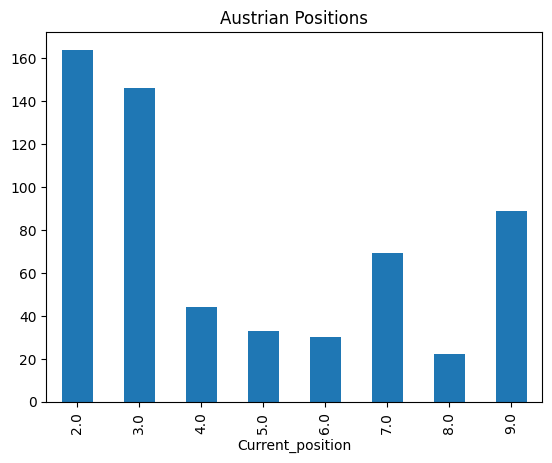

In [25]:
data_at_formatted_academic['Current_position'].value_counts().sort_index().plot(kind='bar')
plt.title('Austrian Positions')

In [26]:
## Creating dummy variables for the categorical variables Current Position, Contract Duration, and Leadership Position:

data_at_formatted_academic_w_dummies = pd.get_dummies(data_at_formatted_academic, columns = ['Current_position', 'Contract_duration', 'Leadership_position'], drop_first=True)

data_at_formatted_academic_w_dummies = data_at_formatted_academic_w_dummies.dropna().reset_index(drop=True)

data_at_formatted_academic_w_dummies = data_at_formatted_academic_w_dummies.astype(float)

## Calculating the interaction terms for Age moderator:
for col in data_at_formatted_academic_w_dummies.columns:
  data_at_formatted_academic_w_dummies[col+'_mod_Age'] = data_at_formatted_academic_w_dummies[col] * data_at_formatted_academic_w_dummies['Age']

data_at_formatted_academic_w_dummies = data_at_formatted_academic_w_dummies.drop(['Age_mod_Age'], axis=1)

data_at_formatted_academic_w_dummies.to_csv('data_at_formatted_academic_w_dummies.csv')

print(data_at_formatted_academic_w_dummies.columns.tolist())
print(np.shape(data_at_formatted_academic_w_dummies))

['Age', 'Salary', 'Actual_hrs', 'Effort', 'Policy_influence', 'Performance_pressure', 'Teaching_percent', 'Research_percent', 'Academic_Resources', 'Perceived_Autonomy', 'Leadership_quality', 'Sense_of_community', 'Job_satisfaction', 'Current_position_3.0', 'Current_position_4.0', 'Current_position_5.0', 'Current_position_6.0', 'Current_position_7.0', 'Current_position_8.0', 'Current_position_9.0', 'Contract_duration_2.0', 'Contract_duration_3.0', 'Contract_duration_6.0', 'Leadership_position_2.0', 'Leadership_position_3.0', 'Salary_mod_Age', 'Actual_hrs_mod_Age', 'Effort_mod_Age', 'Policy_influence_mod_Age', 'Performance_pressure_mod_Age', 'Teaching_percent_mod_Age', 'Research_percent_mod_Age', 'Academic_Resources_mod_Age', 'Perceived_Autonomy_mod_Age', 'Leadership_quality_mod_Age', 'Sense_of_community_mod_Age', 'Job_satisfaction_mod_Age', 'Current_position_3.0_mod_Age', 'Current_position_4.0_mod_Age', 'Current_position_5.0_mod_Age', 'Current_position_6.0_mod_Age', 'Current_position_7

##Correlations and VIF Multicollinearity:

Text(0.5, 1.0, 'AT Correlation Heatmap')

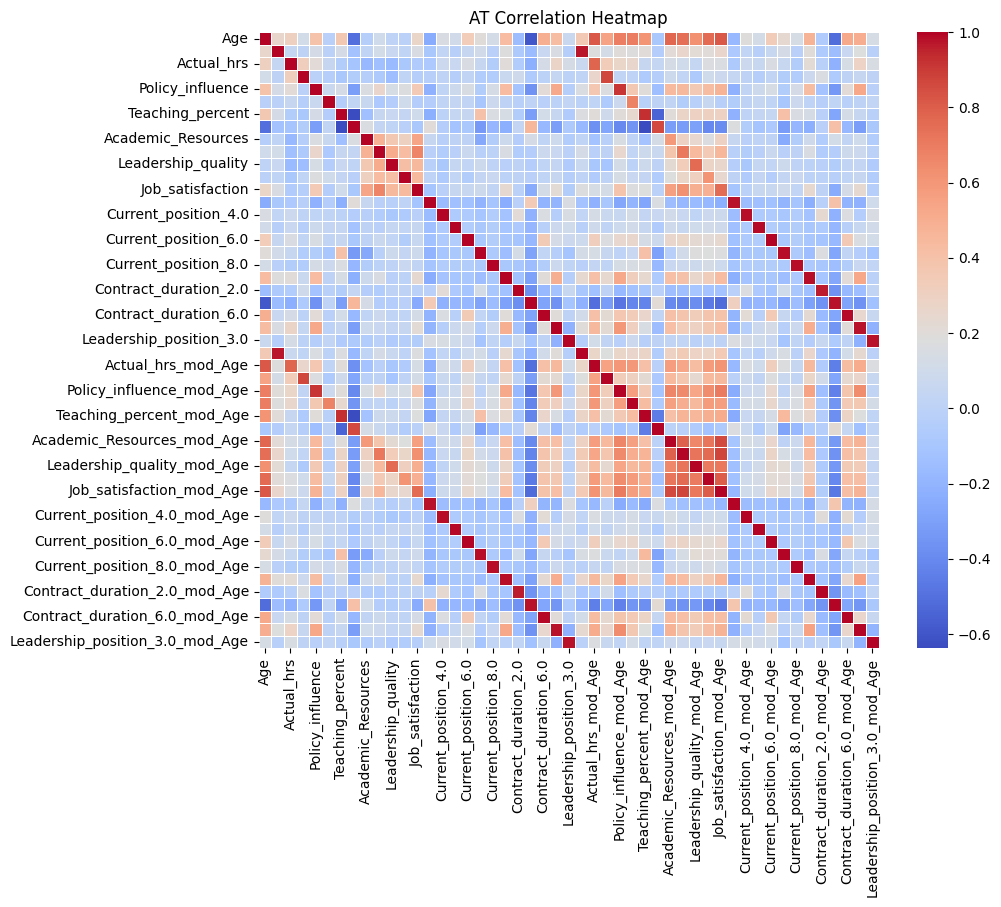

In [34]:
correlations = data_at_formatted_academic_w_dummies.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('AT Correlation Heatmap')

In [28]:
## Performing Variance Inflation Factor (VIF) analysis of the dataset:

Current_position_dummy_cols = [col for col in data_at_formatted_academic_w_dummies.columns if 'Current_position' in col and 'mod_Age' not in col]
## Taking the moderation coefficients separately:
Moderation_cols = [col for col in data_at_formatted_academic_w_dummies.columns if 'mod_Age' in col and 'Job_satisfaction' not in col]
## Taking the remaining variables for working conditions:
Working_condition_cols = [col for col in data_at_formatted_academic_w_dummies.columns if col not in ['Job_satisfaction']+['Age']+Current_position_dummy_cols+Moderation_cols]

for cols in [Current_position_dummy_cols, Working_condition_cols, Moderation_cols]:
  if cols == Current_position_dummy_cols:
    print('Current Position:')
  elif cols == Working_condition_cols:
    print('Working Conditions:')
  elif cols == Moderation_cols:
    print('Age-Moderated Working Conditions:')
  X = data_at_formatted_academic_w_dummies[cols].copy()
  X_const = add_constant(X)
  vif_data = pd.DataFrame()
  vif_data['Variable'] = X_const.columns
  vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

  print(vif_data)
  print('----------------------------------------')

Current Position:
               Variable       VIF
0                 const  3.640244
1  Current_position_3.0  1.427973
2  Current_position_4.0  1.174817
3  Current_position_5.0  1.134820
4  Current_position_6.0  1.123483
5  Current_position_7.0  1.256527
6  Current_position_8.0  1.092352
7  Current_position_9.0  1.312702
----------------------------------------
Working Conditions:
                    Variable        VIF
0                      const  97.761452
1                     Salary   1.096164
2                 Actual_hrs   1.398504
3                     Effort   1.210640
4           Policy_influence   1.699704
5       Performance_pressure   1.061735
6           Teaching_percent   1.986301
7           Research_percent   2.314309
8         Academic_Resources   1.641928
9         Perceived_Autonomy   2.047684
10        Leadership_quality   1.524246
11        Sense_of_community   1.383125
12     Contract_duration_2.0   1.732037
13     Contract_duration_3.0   2.898790
14     Contract

## Calculating Cronbach's Alpha for the combined factors:

In [29]:
def Cronbach_alpha_func(data, label):
  col_nr = data.shape[1]

  item_variances = np.var(data, axis=0, ddof=1)
  total_var = np.var(np.sum(data, axis=1), ddof=1)
  alpha_cronbach = (col_nr/(col_nr-1))*(1-(np.sum(item_variances)/total_var))

  print(f'{label} Cronbach Alpha:', alpha_cronbach)
  return alpha_cronbach

In [30]:
## Academic Resources:

data_at_for_alpha_academic = data_at_job_w_inversion[(data_at_job_w_inversion['Current_position'].isin([2., 3., 4., 5., 6., 7., 8., 9.])) &
                                                     (data_at_job_w_inversion['Contract_duration']<6) &
                                                     (data_at_job_w_inversion['Leadership_position']<4)].dropna()
## Performing inversion:
data_at_for_alpha_academic['Current_position'] = 11. - data_at_for_alpha_academic['Current_position']

print(len(data_at_for_alpha_academic))

academic_resources_for_alpha = np.asarray(data_at_for_alpha_academic[['Acad_res_facility', 'Acad_res_equip', 'Acad_res_lit',
                         'Acad_res_support', 'Acad_res_PD', 'Acad_res_funding']])

perceived_autonomy_for_alpha = np.asarray(data_at_for_alpha_academic[['Be_myself', "Follow_commands", 'Do_differently',
                                                             'Want_to_do', 'Done_best', 'Forced_to_do']])

leadership_quality_for_alpha = np.asarray(data_at_for_alpha_academic[['Development_opportunities', 'Prioritizes_satisfaction',
                                                             'Work_planning', 'Solving_conflicts']])

sense_of_community_for_alpha = np.asarray(data_at_for_alpha_academic[['Good_atmosphere', 'Good_cooperation', 'Part_of_community']])

job_satisfaction_for_alpha = np.asarray(data_at_for_alpha_academic[['Work_prospects', 'Physical_working_conditions',
                                                                      'Use_of_abilities', 'Satisfaction_w_salary',
                                                                      'Overall_satisfaction']])


acad_res_cron_alpha = Cronbach_alpha_func(academic_resources_for_alpha, 'Academic Resources')
perc_auton_cron_alpha = Cronbach_alpha_func(perceived_autonomy_for_alpha, 'Perceived Autonomy')
lead_qual_cron_alpha = Cronbach_alpha_func(leadership_quality_for_alpha, 'Leadership Quality')
sens_comm_cron_alpha = Cronbach_alpha_func(sense_of_community_for_alpha, 'Sense of Community')
print('---------------------')
job_sat_cron_alpha = Cronbach_alpha_func(job_satisfaction_for_alpha, 'Job Satisfaction')





529
Academic Resources Cronbach Alpha: 0.7756544249179264
Perceived Autonomy Cronbach Alpha: 0.8722286747238418
Leadership Quality Cronbach Alpha: 0.8929522294512374
Sense of Community Cronbach Alpha: 0.8609629553729216
---------------------
Job Satisfaction Cronbach Alpha: 0.7642879383191997


## Structural Equation Modelling:

We study the relationship between academic position and job satisfaction, mediated by working conditions and moderated by age.

In [31]:
## Taking the response variable (Job satisfaction), the moderator variable (Age), and the predictor variable(s) (Current Position):
Job_satisfaction_col = ['Job_satisfaction']
Age_col = ['Age']
Current_position_dummy_cols = [col for col in data_at_formatted_academic_w_dummies.columns if 'Current_position' in col and 'mod_Age' not in col]

## Taking the moderation coefficients separately:
Moderation_cols = [col for col in data_at_formatted_academic_w_dummies.columns if 'mod_Age' in col]

## Taking the remaining variables for working conditions:
Working_condition_cols = [col for col in data_at_formatted_academic_w_dummies.columns if col not in Job_satisfaction_col+Age_col+Current_position_dummy_cols+Moderation_cols]

Working_condition_cols

['Salary',
 'Actual_hrs',
 'Effort',
 'Policy_influence',
 'Performance_pressure',
 'Teaching_percent',
 'Research_percent',
 'Academic_Resources',
 'Perceived_Autonomy',
 'Leadership_quality',
 'Sense_of_community',
 'Contract_duration_2.0',
 'Contract_duration_3.0',
 'Contract_duration_6.0',
 'Leadership_position_2.0',
 'Leadership_position_3.0']

In [32]:
Current_position_dummy_cols

['Current_position_3.0',
 'Current_position_4.0',
 'Current_position_5.0',
 'Current_position_6.0',
 'Current_position_7.0',
 'Current_position_8.0',
 'Current_position_9.0']

In [33]:
Moderation_cols

['Salary_mod_Age',
 'Actual_hrs_mod_Age',
 'Effort_mod_Age',
 'Policy_influence_mod_Age',
 'Performance_pressure_mod_Age',
 'Teaching_percent_mod_Age',
 'Research_percent_mod_Age',
 'Academic_Resources_mod_Age',
 'Perceived_Autonomy_mod_Age',
 'Leadership_quality_mod_Age',
 'Sense_of_community_mod_Age',
 'Job_satisfaction_mod_Age',
 'Current_position_3.0_mod_Age',
 'Current_position_4.0_mod_Age',
 'Current_position_5.0_mod_Age',
 'Current_position_6.0_mod_Age',
 'Current_position_7.0_mod_Age',
 'Current_position_8.0_mod_Age',
 'Current_position_9.0_mod_Age',
 'Contract_duration_2.0_mod_Age',
 'Contract_duration_3.0_mod_Age',
 'Contract_duration_6.0_mod_Age',
 'Leadership_position_2.0_mod_Age',
 'Leadership_position_3.0_mod_Age']

In [35]:
Current_position_factors = " + ".join(Current_position_dummy_cols)
Working_condition_factors = " + ".join(Working_condition_cols)
Moderation_factors = " + ".join(Moderation_cols)

path_no_mod = f"""
Salary ~ {Current_position_factors}
Actual_hrs ~ {Current_position_factors}
Effort ~ {Current_position_factors}
Policy_influence ~ {Current_position_factors}
Performance_pressure ~ {Current_position_factors}
Teaching_percent ~ {Current_position_factors}
Research_percent ~ {Current_position_factors}
Academic_Resources ~ {Current_position_factors}
Perceived_Autonomy ~ {Current_position_factors}
Leadership_quality ~ {Current_position_factors}
Sense_of_community ~ {Current_position_factors}
Contract_duration_2.0 ~ {Current_position_factors}
Contract_duration_3.0 ~ {Current_position_factors}
Contract_duration_6.0 ~ {Current_position_factors}
Leadership_position_2.0 ~ {Current_position_factors}
Leadership_position_3.0 ~ {Current_position_factors}
Job_satisfaction ~ {Working_condition_factors} + {Current_position_factors}
"""



path = f"""
Salary ~ {Current_position_factors}
Actual_hrs ~ {Current_position_factors}
Effort ~ {Current_position_factors}
Policy_influence ~ {Current_position_factors}
Performance_pressure ~ {Current_position_factors}
Teaching_percent ~ {Current_position_factors}
Research_percent ~ {Current_position_factors}
Academic_Resources ~ {Current_position_factors}
Perceived_Autonomy ~ {Current_position_factors}
Leadership_quality ~ {Current_position_factors}
Sense_of_community ~ {Current_position_factors}
Contract_duration_2.0 ~ {Current_position_factors}
Contract_duration_3.0 ~ {Current_position_factors}
Contract_duration_6.0 ~ {Current_position_factors}
Leadership_position_2.0 ~ {Current_position_factors}
Leadership_position_3.0 ~ {Current_position_factors}
Job_satisfaction ~ {Working_condition_factors} + {Current_position_factors} + {Moderation_factors}
"""


In [36]:
model = semopy.Model(path)
result = model.fit(data_at_formatted_academic_w_dummies)
print(result)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 48.988
Number of iterations: 591
Params: 13.626 45.274 12.777 55.032 56.512 16.468 77.030 2.917 7.069 6.998 11.040 5.760 1.718 9.377 -4.203 -0.762 -12.467 5.629 -7.252 -13.265 5.314 0.083 0.596 0.899 1.223 0.381 1.278 1.694 -0.107 0.029 0.105 0.056 -0.295 0.347 -0.028 1.536 9.803 13.345 14.414 33.233 26.952 16.837 -7.934 -19.661 -27.668 -25.089 -38.002 -39.299 -29.787 -0.044 -0.183 -0.095 -0.093 -0.645 -0.299 0.039 0.105 -0.041 0.074 0.390 0.085 0.123 0.462 -0.002 -0.300 0.235 0.192 0.296 0.090 0.003 0.044 -0.182 0.138 -0.153 0.119 0.319 0.020 -0.041 0.258 -0.159 -0.220 0.099 -0.220 -0.152 -0.078 -0.756 -0.756 -0.756 -0.756 -0.756 -0.722 -0.006 0.289 0.085 0.594 0.139 0.039 0.264 0.050 0.141 0.315 0.415 0.156 0.345 0.678 0.222 0.317 0.279 0.242 0.019 0.157 0.099 0.000 0.001 -0.001 0.018 -0.011 -0.000 0.002 0.405 0.367 0.023 0.115 0.004 -0.081 0.007 0.019 -0.0

In [37]:
## Evaluating the model fit:
if 'Optimization terminated successfully' in result.message:
    print('Optimization Successful')
    print('EVALUATION:')
    fit_evaluation = semopy.calc_stats(model)
    print(fit_evaluation.T)
    print('-'*25)

Optimization Successful
EVALUATION:
                      Value
DoF             1000.000000
DoF Baseline    1159.000000
chi2           29246.050607
chi2 p-value       0.000000
chi2 Baseline  57877.195202
CFI                0.501993
GFI                0.494688
AGFI               0.414343
NFI                0.494688
TLI                0.422810
RMSEA              0.217699
AIC              254.023281
BIC             1027.000693
LogLik            48.988359
-------------------------


In [38]:
ins = model.inspect()
print(ins)
ins.to_csv('AT_Model_Parameter_Values.csv')

                   lval  op                  rval     Estimate    Std. Err  \
0                Salary   ~  Current_position_3.0    13.625566    8.701881   
1                Salary   ~  Current_position_4.0    45.274108   12.984165   
2                Salary   ~  Current_position_5.0    12.777324   14.590993   
3                Salary   ~  Current_position_6.0    55.031956   15.186194   
4                Salary   ~  Current_position_7.0    56.511918   10.973928   
..                  ...  ..                   ...          ...         ...   
171    Research_percent  ~~      Research_percent   373.976387   21.645719   
172              Salary  ~~                Salary  5848.725906  338.523717   
173  Sense_of_community  ~~    Sense_of_community     0.870924    0.050409   
174    Teaching_percent  ~~      Teaching_percent   300.118968   17.370858   
175    Job_satisfaction  ~~      Job_satisfaction     0.015853    0.000918   

       z-value       p-value  
0     1.565819  1.173911e-01  
1

In [39]:
ins[ins['p-value']<0.05]

,lval,op,rval,Estimate,Std. Err,z-value,p-value
1,Salary,~,Current_position_4.0,45.274108,12.984165,3.486871,4.887072e-04
3,Salary,~,Current_position_6.0,55.031956,15.186194,3.623815,2.902894e-04
4,Salary,~,Current_position_7.0,56.511918,10.973928,5.149652,2.609695e-07
6,Salary,~,Current_position_9.0,77.030179,10.068713,7.650449,1.998401e-14
7,Actual_hrs,~,Current_position_3.0,2.916592,1.106925,2.634859,8.417222e-03
...,...,...,...,...,...,...,...
171,Research_percent,~~,Research_percent,373.976387,21.645719,17.277153,0.000000e+00
172,Salary,~~,Salary,5848.725906,338.523717,17.277153,0.000000e+00
173,Sense_of_community,~~,Sense_of_community,0.870924,0.050409,17.277153,0.000000e+00
174,Teaching_percent,~~,Teaching_percent,300.118968,17.370858,17.277153,0.000000e+00


In [40]:
significance = []

for i in range(len(ins)):
  if ins['p-value'].iloc[i] <= 0.001:
    significance.append('***')
  elif 0.001 < ins['p-value'].iloc[i] <= 0.01:
    significance.append('**')
  elif 0.01 < ins['p-value'].iloc[i] <= 0.05:
    significance.append('*')
  else:
    significance.append(' (n.s.)')

ins['Significance'] = significance

ins['Estimate w Significance'] = round(ins['Estimate'],5).astype(str) + ins['Significance']
ins

,lval,op,rval,Estimate,Std. Err,z-value,p-value,Significance,Estimate w Significance
0,Salary,~,Current_position_3.0,13.625566,8.701881,1.565819,1.173911e-01,(n.s.),13.62557 (n.s.)
1,Salary,~,Current_position_4.0,45.274108,12.984165,3.486871,4.887072e-04,***,45.27411***
2,Salary,~,Current_position_5.0,12.777324,14.590993,0.875699,3.811935e-01,(n.s.),12.77732 (n.s.)
3,Salary,~,Current_position_6.0,55.031956,15.186194,3.623815,2.902894e-04,***,55.03196***
4,Salary,~,Current_position_7.0,56.511918,10.973928,5.149652,2.609695e-07,***,56.51192***
...,...,...,...,...,...,...,...,...,...
171,Research_percent,~~,Research_percent,373.976387,21.645719,17.277153,0.000000e+00,***,373.97639***
172,Salary,~~,Salary,5848.725906,338.523717,17.277153,0.000000e+00,***,5848.72591***
173,Sense_of_community,~~,Sense_of_community,0.870924,0.050409,17.277153,0.000000e+00,***,0.87092***
174,Teaching_percent,~~,Teaching_percent,300.118968,17.370858,17.277153,0.000000e+00,***,300.11897***


In [41]:
ins

## Saving the Job Position pathway coefficients for the SEM:
job_pos_paths = pd.DataFrame()
job_pos_paths['lval'] = ins['lval'][ins['rval']==Current_position_dummy_cols[0]]

for curr_pos in Current_position_dummy_cols:
  job_pos_paths = pd.merge(job_pos_paths, ins[['lval', 'Estimate w Significance']][ins['rval']==curr_pos], on='lval', how='left')
  job_pos_paths.rename(columns={job_pos_paths.columns[-1]: curr_pos}, inplace=True)

job_pos_paths


## Saving the Working Conditions pathway coefficients for the SEM:
work_cond_paths = pd.DataFrame()
work_cond_paths['lval'] = [ins['lval'][ins['rval']==Working_condition_cols[0]].iloc[0]]

for work_cond in Working_condition_cols:
  work_cond_paths = pd.merge(work_cond_paths, ins[['lval', 'Estimate w Significance']][ins['rval']==work_cond], on='lval', how='left')
  work_cond_paths.rename(columns={work_cond_paths.columns[-1]: work_cond}, inplace=True)

work_cond_paths


# ## Saving the moderator pathway coefficients for the SEM:
mod_age_paths = pd.DataFrame()
mod_age_paths['lval'] = [ins['lval'][ins['rval']==Moderation_cols[0]].iloc[0]]

for mod_age in Moderation_cols:
  mod_age_paths = pd.merge(mod_age_paths, ins[['lval', 'Estimate w Significance']][ins['rval']==mod_age], on='lval', how='left')
  mod_age_paths.rename(columns={mod_age_paths.columns[-1]: mod_age}, inplace=True)


job_pos_paths



,lval,Current_position_3.0,Current_position_4.0,Current_position_5.0,Current_position_6.0,Current_position_7.0,Current_position_8.0,Current_position_9.0
0,Salary,13.62557 (n.s.),45.27411***,12.77732 (n.s.),55.03196***,56.51192***,16.46788 (n.s.),77.03018***
1,Actual_hrs,2.91659**,7.06859***,6.99806***,11.04029***,5.75984***,1.71787 (n.s.),9.37691***
2,Effort,-4.2032 (n.s.),-0.76229 (n.s.),-12.46704 (n.s.),5.6292 (n.s.),-7.25162 (n.s.),-13.26481 (n.s.),5.31445 (n.s.)
3,Policy_influence,0.08344 (n.s.),0.5959***,0.89892***,1.22317***,0.38114**,1.27772***,1.69396***
4,Performance_pressure,-0.10691 (n.s.),0.02883 (n.s.),0.10458 (n.s.),0.0561 (n.s.),-0.29463*,0.34701 (n.s.),-0.02837 (n.s.)
5,Teaching_percent,1.53559 (n.s.),9.80265***,13.34453***,14.41375***,33.23336***,26.95189***,16.83667***
6,Research_percent,-7.93426***,-19.66124***,-27.66787***,-25.08869***,-38.00202***,-39.299***,-29.78703***
7,Academic_Resources,-0.04422 (n.s.),-0.1831 (n.s.),-0.09539 (n.s.),-0.09323 (n.s.),-0.64485***,-0.29934 (n.s.),0.03901 (n.s.)
8,Perceived_Autonomy,0.10541 (n.s.),-0.04125 (n.s.),0.07356 (n.s.),0.38956*,0.08545 (n.s.),0.12349 (n.s.),0.46223***
9,Leadership_quality,-0.00222 (n.s.),-0.30028 (n.s.),0.23497 (n.s.),0.19248 (n.s.),0.29581 (n.s.),0.09016 (n.s.),0.00284 (n.s.)


In [43]:
work_cond_paths.set_index('lval').T

lval,Job_satisfaction
Salary,0.00013*
Actual_hrs,0.0012*
Effort,-0.00128***
Policy_influence,0.01817***
Performance_pressure,-0.01135*
Teaching_percent,-8e-05 (n.s.)
Research_percent,0.00209***
Academic_Resources,0.40456***
Perceived_Autonomy,0.3672***
Leadership_quality,0.02276***


In [42]:
mod_age_paths.set_index('lval').T

lval,Job_satisfaction
Salary_mod_Age,-0.0*
Actual_hrs_mod_Age,-2e-05 (n.s.)
Effort_mod_Age,1e-05***
Policy_influence_mod_Age,-0.00043**
Performance_pressure_mod_Age,0.0002 (n.s.)
Teaching_percent_mod_Age,0.0 (n.s.)
Research_percent_mod_Age,-4e-05***
Academic_Resources_mod_Age,-0.00985***
Perceived_Autonomy_mod_Age,-0.00855***
Leadership_quality_mod_Age,-0.00035**


In [43]:
med_mod_path_values = pd.DataFrame(columns = ['Current_position']+Working_condition_cols)

for curr_pos in Current_position_dummy_cols:
  path_coeff = [curr_pos]
  for work_cond in Working_condition_cols:
    try:
      path_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
                        (ins['lval']==work_cond)])* float(ins['Estimate'][(ins['rval']==work_cond) &
                        (ins['lval']=='Job_satisfaction')].iloc[0]))
    except:
      path_coeff.append(np.nan)
  med_mod_path_values.loc[len(med_mod_path_values)] = path_coeff
med_mod_path_values

/tmp/ipython-input-1715873352.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  path_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
/tmp/ipython-input-1715873352.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  path_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
/tmp/ipython-input-1715873352.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  path_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
/tmp/ipython-input-1715873352.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  path_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
/tmp/ipython

,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_6.0,Leadership_position_2.0,Leadership_position_3.0
0,Current_position_3.0,0.001811,0.003507,0.005393,0.001516,0.001214,-0.000130,-0.016558,-0.017890,0.038707,-0.000051,0.005112,-0.000148,0.006292,-0.000041,0.000944,-0.003022
1,Current_position_4.0,0.006018,0.008499,0.000978,0.010826,-0.000327,-0.000829,-0.041032,-0.074074,-0.015147,-0.006836,-0.020962,0.000923,0.060979,0.001939,0.002647,-0.004306
2,Current_position_5.0,0.001698,0.008414,0.015995,0.016331,-0.001187,-0.001128,-0.057741,-0.038590,0.027012,0.005349,0.015822,-0.000569,0.060980,0.000568,0.005922,-0.003790
3,Current_position_6.0,0.007315,0.013274,-0.007222,0.022222,-0.000637,-0.001219,-0.052359,-0.037715,0.143045,0.004382,-0.017614,-0.000786,0.060980,0.003980,0.007801,-0.003296
4,Current_position_7.0,0.007511,0.006925,0.009304,0.006924,0.003345,-0.002810,-0.079308,-0.260879,0.031379,0.006734,0.013701,0.000356,0.060979,0.000930,0.002925,-0.000260
5,Current_position_8.0,0.002189,0.002065,0.017018,0.023213,-0.003940,-0.002279,-0.082015,-0.121101,0.045345,0.002053,0.036718,-0.000786,0.060980,0.000264,0.006491,-0.002141
6,Current_position_9.0,0.010238,0.011274,-0.006818,0.030775,0.000322,-0.001424,-0.062164,0.015782,0.169728,0.000065,0.002329,-0.000545,0.058261,0.001766,0.012750,-0.001349


In [44]:
## Path Modelling with no age moderation:
model_no_mod = semopy.Model(path_no_mod)
result_no_mod = model_no_mod.fit(data_at_formatted_academic_w_dummies)
print(result_no_mod)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 2.905
Number of iterations: 486
Params: 15.829 53.861 12.913 54.490 63.509 31.356 80.247 2.920 7.074 7.005 11.049 5.764 1.719 9.381 -3.163 0.906 -1.895 0.455 -7.228 -11.741 5.780 0.083 0.596 0.899 1.223 0.381 1.278 1.694 -0.107 0.029 0.105 0.056 -0.295 0.347 -0.028 1.437 9.612 12.629 14.282 33.123 27.947 16.729 -8.091 -20.053 -27.611 -25.191 -38.219 -39.859 -29.976 -0.044 -0.183 -0.095 -0.093 -0.645 -0.299 0.039 0.105 -0.041 0.074 0.390 0.085 0.123 0.462 -0.002 -0.300 0.235 0.192 0.296 0.090 0.003 0.044 -0.182 0.138 -0.153 0.119 0.319 0.020 -0.041 0.258 -0.159 -0.220 0.099 -0.220 -0.152 -0.078 -0.756 -0.756 -0.756 -0.756 -0.756 -0.722 -0.006 0.289 0.085 0.594 0.139 0.039 0.264 0.050 0.141 0.315 0.415 0.156 0.345 0.678 0.222 0.317 0.279 0.242 0.019 0.157 0.099 0.000 -0.002 0.000 0.037 -0.027 -0.001 0.001 0.380 0.352 0.028 0.126 -0.106 -0.316 -0.090 0.013 -0.05

In [45]:
if 'Optimization terminated successfully' in result_no_mod.message:
    print('Optimization Successful')
    print('EVALUATION:')
    fit_evaluation_no_mod = semopy.calc_stats(model_no_mod)
    print(fit_evaluation_no_mod.T)
    print('-'*25)

Optimization Successful
EVALUATION:
                     Value
DoF             148.000000
DoF Baseline    283.000000
chi2           1734.220580
chi2 p-value      0.000000
chi2 Baseline  4578.183583
CFI               0.630698
GFI               0.621199
AGFI              0.275671
NFI               0.621199
TLI               0.293834
RMSEA             0.134100
AIC             298.190216
BIC             965.761617
LogLik            2.904892
-------------------------


## Bootstrapping:

In [47]:
times = 3

Evaluation_cols = ['DoF', 'DoF Baseline', 'chi2', 'chi2 p-value', 'chi2 Baseline', 'CFI',
                   'GFI', 'AGFI', 'NFI', 'TLI', 'RMSEA', 'AIC', 'BIC', 'LogLik']

bootstrap_path_values = pd.DataFrame(columns = ['Bootstrap_nr', 'Current_position']+Working_condition_cols+['Job_satisfaction']+Evaluation_cols)
mediation_path_values = pd.DataFrame(columns = ['Bootstrap_nr']+Working_condition_cols+Evaluation_cols)
moderation_path_values = pd.DataFrame(columns = ['Bootstrap_nr']+Moderation_cols+Evaluation_cols)
bootstrap_path_values_no_mod = pd.DataFrame(columns = ['Bootstrap_nr', 'Current_position']+Working_condition_cols+['Job_satisfaction']+Evaluation_cols)
mediation_path_values_no_mod = pd.DataFrame(columns = ['Bootstrap_nr']+Working_condition_cols+Evaluation_cols)

model = semopy.Model(path)
model_no_mod = semopy.Model(path_no_mod)

for i in range(times):
  print('Run:', i)
  data_at_bootstrapped = data_at_formatted_academic_w_dummies.sample(n=len(data_at_formatted_academic_w_dummies), replace=True, random_state=i).reset_index(drop=True)

  try:
    result = model.fit(data_at_bootstrapped)
    ins = model.inspect()
    result_no_mod = model_no_mod.fit(data_at_bootstrapped)
    ins_no_mod = model_no_mod.inspect()
    if 'Optimization terminated successfully' in result.message and 'Optimization terminated successfully' in result_no_mod.message:
      print('Optimization Successful')

      ## ---------------- Returning the full indirect path fits for the path model with Age moderation: ----------------------
      fit_evaluation = semopy.calc_stats(model)
      print('EVALUATION (Chi2 p-value):', float(fit_evaluation['chi2 p-value'].iloc[0]))

      for curr_pos in Current_position_dummy_cols:
        path_coeff = [i, curr_pos]
        for work_cond in Working_condition_cols:
          try:
            path_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
                              (ins['lval']==work_cond)].iloc[0]) * float(ins['Estimate'][(ins['rval']==work_cond) &
                              (ins['lval']=='Job_satisfaction')].iloc[0]))
          except:
            path_coeff.append(np.nan)
        path_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
                          (ins['lval']=='Job_satisfaction')].iloc[0]))
        path_coeff = path_coeff + fit_evaluation.iloc[0].tolist()
        bootstrap_path_values.loc[len(bootstrap_path_values)] = path_coeff

      ## Printing the mediation pathways with Age moderation:
      med_coeff = [i]
      for work_cond in Working_condition_cols:
          try:
            med_coeff.append(float(ins['Estimate'][(ins['rval']==work_cond) &
                              (ins['lval']=='Job_satisfaction')].iloc[0]))
          except:
            med_coeff.append(np.nan)
      med_coeff = med_coeff + fit_evaluation.iloc[0].tolist()
      mediation_path_values.loc[len(mediation_path_values)] = med_coeff

      ## Printing the moderation coefficients for Age moderation:
      mod_coeff = [i]
      for mod_element in Moderation_cols:
        try:
          mod_coeff.append(float(ins['Estimate'][(ins['rval']==mod_element) &
                            (ins['lval']=='Job_satisfaction')].iloc[0]))
        except:
          mod_coeff.append(np.nan)
      mod_coeff = mod_coeff + fit_evaluation.iloc[0].tolist()
      moderation_path_values.loc[len(moderation_path_values)] = mod_coeff


      ## ---------------- Returning the full indirect path fits for the path model without Age moderation: ----------------------
      fit_evaluation_no_mod = semopy.calc_stats(model_no_mod)
      print('EVALUATION NO MOD (Chi2 p-value):', float(fit_evaluation_no_mod['chi2 p-value'].iloc[0]))

      for curr_pos in Current_position_dummy_cols:
        path_coeff_no_mod = [i, curr_pos]
        for work_cond in Working_condition_cols:
          try:
            path_coeff_no_mod.append(float(ins_no_mod['Estimate'][(ins_no_mod['rval']==curr_pos) &
                              (ins_no_mod['lval']==work_cond)].iloc[0]) * float(ins_no_mod['Estimate'][(ins_no_mod['rval']==work_cond) &
                              (ins_no_mod['lval']=='Job_satisfaction')].iloc[0]))
          except:
            path_coeff_no_mod.append(np.nan)
        path_coeff_no_mod.append(float(ins_no_mod['Estimate'][(ins_no_mod['rval']==curr_pos) &
                            (ins_no_mod['lval']=='Job_satisfaction')].iloc[0]))
        path_coeff_no_mod = path_coeff_no_mod + fit_evaluation_no_mod.iloc[0].tolist()
        bootstrap_path_values_no_mod.loc[len(bootstrap_path_values_no_mod)] = path_coeff_no_mod

      ## Printing the mediation pathways without Age moderation:
      med_coeff_no_mod = [i]
      for work_cond in Working_condition_cols:
        try:
          med_coeff_no_mod.append(float(ins_no_mod['Estimate'][(ins_no_mod['rval']==work_cond) &
                            (ins_no_mod['lval']=='Job_satisfaction')].iloc[0]))
        except:
          med_coeff_no_mod.append(np.nan)
      med_coeff_no_mod = med_coeff_no_mod + fit_evaluation_no_mod.iloc[0].tolist()
      mediation_path_values_no_mod.loc[len(mediation_path_values_no_mod)] = med_coeff_no_mod
    else:
      print('Optimization Unsuccessful')
  except:
    pass


bootstrap_path_values

Run: 0
Optimization Successful
EVALUATION (Chi2 p-value): 0.0
EVALUATION NO MOD (Chi2 p-value): 0.0
Run: 1
Optimization Successful
EVALUATION (Chi2 p-value): 0.0
EVALUATION NO MOD (Chi2 p-value): 0.0
Run: 2
Optimization Successful
EVALUATION (Chi2 p-value): 0.0
EVALUATION NO MOD (Chi2 p-value): 0.0


,Bootstrap_nr,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,...,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
0,0,Current_position_3.0,-0.000801,-0.001813,-0.015835,0.002155,-0.001798,0.004936,-0.024424,-0.010545,...,59711.290679,0.500759,0.493702,0.413201,0.493702,0.421380,0.221464,250.721308,1023.698720,50.639346
1,0,Current_position_4.0,-0.003379,-0.004124,0.007586,0.013816,0.001462,0.015313,-0.040732,-0.061130,...,59711.290679,0.500759,0.493702,0.413201,0.493702,0.421380,0.221464,250.721308,1023.698720,50.639346
2,0,Current_position_5.0,-0.002228,-0.003504,0.010343,0.027223,0.000388,0.020534,-0.054552,-0.027422,...,59711.290679,0.500759,0.493702,0.413201,0.493702,0.421380,0.221464,250.721308,1023.698720,50.639346
3,0,Current_position_6.0,-0.005693,-0.005122,0.000991,0.031371,0.001278,0.018756,-0.045181,0.025793,...,59711.290679,0.500759,0.493702,0.413201,0.493702,0.421380,0.221464,250.721308,1023.698720,50.639346
4,0,Current_position_7.0,-0.005744,-0.003908,0.021726,0.007729,-0.002694,0.039865,-0.068409,-0.247146,...,59711.290679,0.500759,0.493702,0.413201,0.493702,0.421380,0.221464,250.721308,1023.698720,50.639346
5,0,Current_position_8.0,-0.003566,-0.000942,0.038498,0.043761,0.005359,0.036539,-0.072430,-0.058799,...,59711.290679,0.500759,0.493702,0.413201,0.493702,0.421380,0.221464,250.721308,1023.698720,50.639346
6,0,Current_position_9.0,-0.009066,-0.004438,-0.000061,0.058601,0.001234,0.026080,-0.059524,0.046163,...,59711.290679,0.500759,0.493702,0.413201,0.493702,0.421380,0.221464,250.721308,1023.698720,50.639346
7,1,Current_position_3.0,0.000535,0.013264,0.040409,0.006274,-0.000675,0.002047,-0.011001,-0.014274,...,58511.724296,0.453126,0.446868,0.358920,0.446868,0.366173,0.229402,243.575504,1016.552916,54.212248
8,1,Current_position_4.0,0.001962,0.025855,0.040982,0.036717,-0.002948,0.015807,-0.030183,0.012690,...,58511.724296,0.453126,0.446868,0.358920,0.446868,0.366173,0.229402,243.575504,1016.552916,54.212248
9,1,Current_position_5.0,0.001079,0.038866,0.039304,0.045686,-0.002171,0.016531,-0.032793,-0.093286,...,58511.724296,0.453126,0.446868,0.358920,0.446868,0.366173,0.229402,243.575504,1016.552916,54.212248


In [ ]:
bootstrap_path_values.to_csv('AT_bootstrap_path_values.csv')
mediation_path_values.to_csv('AT_mediation_path_values.csv')
moderation_path_values.to_csv('AT_moderation_path_values.csv')
bootstrap_path_values_no_mod.to_csv('AT_bootstrap_path_values_no_mod.csv')
mediation_path_values_no_mod.to_csv('AT_mediation_path_values_no_mod.csv')

In [48]:
bootstrap_path_values

,Bootstrap_nr,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,...,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
0,0,Current_position_3.0,-0.000801,-0.001813,-0.015835,0.002155,-0.001798,0.004936,-0.024424,-0.010545,...,59711.290679,0.500759,0.493702,0.413201,0.493702,0.421380,0.221464,250.721308,1023.698720,50.639346
1,0,Current_position_4.0,-0.003379,-0.004124,0.007586,0.013816,0.001462,0.015313,-0.040732,-0.061130,...,59711.290679,0.500759,0.493702,0.413201,0.493702,0.421380,0.221464,250.721308,1023.698720,50.639346
2,0,Current_position_5.0,-0.002228,-0.003504,0.010343,0.027223,0.000388,0.020534,-0.054552,-0.027422,...,59711.290679,0.500759,0.493702,0.413201,0.493702,0.421380,0.221464,250.721308,1023.698720,50.639346
3,0,Current_position_6.0,-0.005693,-0.005122,0.000991,0.031371,0.001278,0.018756,-0.045181,0.025793,...,59711.290679,0.500759,0.493702,0.413201,0.493702,0.421380,0.221464,250.721308,1023.698720,50.639346
4,0,Current_position_7.0,-0.005744,-0.003908,0.021726,0.007729,-0.002694,0.039865,-0.068409,-0.247146,...,59711.290679,0.500759,0.493702,0.413201,0.493702,0.421380,0.221464,250.721308,1023.698720,50.639346
5,0,Current_position_8.0,-0.003566,-0.000942,0.038498,0.043761,0.005359,0.036539,-0.072430,-0.058799,...,59711.290679,0.500759,0.493702,0.413201,0.493702,0.421380,0.221464,250.721308,1023.698720,50.639346
6,0,Current_position_9.0,-0.009066,-0.004438,-0.000061,0.058601,0.001234,0.026080,-0.059524,0.046163,...,59711.290679,0.500759,0.493702,0.413201,0.493702,0.421380,0.221464,250.721308,1023.698720,50.639346
7,1,Current_position_3.0,0.000535,0.013264,0.040409,0.006274,-0.000675,0.002047,-0.011001,-0.014274,...,58511.724296,0.453126,0.446868,0.358920,0.446868,0.366173,0.229402,243.575504,1016.552916,54.212248
8,1,Current_position_4.0,0.001962,0.025855,0.040982,0.036717,-0.002948,0.015807,-0.030183,0.012690,...,58511.724296,0.453126,0.446868,0.358920,0.446868,0.366173,0.229402,243.575504,1016.552916,54.212248
9,1,Current_position_5.0,0.001079,0.038866,0.039304,0.045686,-0.002171,0.016531,-0.032793,-0.093286,...,58511.724296,0.453126,0.446868,0.358920,0.446868,0.366173,0.229402,243.575504,1016.552916,54.212248


In [49]:
moderation_path_values

,Bootstrap_nr,Salary_mod_Age,Actual_hrs_mod_Age,Effort_mod_Age,Policy_influence_mod_Age,Performance_pressure_mod_Age,Teaching_percent_mod_Age,Research_percent_mod_Age,Academic_Resources_mod_Age,Perceived_Autonomy_mod_Age,...,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
0,0.0,2.500621e-06,0.000027,0.000024,-0.000712,-0.000281,-0.000038,-0.000041,-0.010517,-0.009038,...,59711.290679,0.500759,0.493702,0.413201,0.493702,0.421380,0.221464,250.721308,1023.698720,50.639346
1,1.0,-5.104660e-07,-0.000130,0.000083,-0.001026,0.000595,-0.000037,-0.000018,-0.008406,-0.008944,...,58511.724296,0.453126,0.446868,0.358920,0.446868,0.366173,0.229402,243.575504,1016.552916,54.212248
2,2.0,-5.752898e-06,-0.000099,0.000037,-0.000140,0.000710,0.000009,-0.000017,-0.009863,-0.007924,...,59666.585162,0.479334,0.472688,0.388845,0.472688,0.396548,0.226080,246.596598,1019.574010,52.701701


In [50]:
bootstrap_path_values_no_mod

,Bootstrap_nr,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,...,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
0,0,Current_position_3.0,-0.001475,-0.023691,0.006485,0.005986,0.005512,0.006712,-0.042705,-0.009727,...,5011.655348,0.633681,0.624835,0.282624,0.624835,0.299538,0.140134,297.701180,965.272581,3.149410
1,0,Current_position_4.0,-0.006205,-0.053893,-0.003149,0.038397,-0.004485,0.020844,-0.071223,-0.056376,...,5011.655348,0.633681,0.624835,0.282624,0.624835,0.299538,0.140134,297.701180,965.272581,3.149410
2,0,Current_position_5.0,-0.004086,-0.045794,-0.004235,0.075671,-0.001194,0.027915,-0.095398,-0.025294,...,5011.655348,0.633681,0.624835,0.282624,0.624835,0.299538,0.140134,297.701180,965.272581,3.149410
3,0,Current_position_6.0,-0.010453,-0.066940,-0.000386,0.087188,-0.003922,0.025538,-0.079004,0.023765,...,5011.655348,0.633681,0.624835,0.282624,0.624835,0.299538,0.140134,297.701180,965.272581,3.149410
4,0,Current_position_7.0,-0.010537,-0.051072,-0.008966,0.021482,0.008259,0.054245,-0.119625,-0.227836,...,5011.655348,0.633681,0.624835,0.282624,0.624835,0.299538,0.140134,297.701180,965.272581,3.149410
5,0,Current_position_8.0,-0.006566,-0.012301,-0.015871,0.121637,-0.016428,0.049717,-0.126648,-0.054216,...,5011.655348,0.633681,0.624835,0.282624,0.624835,0.299538,0.140134,297.701180,965.272581,3.149410
6,0,Current_position_9.0,-0.016632,-0.058001,-0.000017,0.162879,-0.003785,0.035488,-0.104095,0.042550,...,5011.655348,0.633681,0.624835,0.282624,0.624835,0.299538,0.140134,297.701180,965.272581,3.149410
7,1,Current_position_3.0,0.000417,0.009834,0.040487,0.005874,-0.000133,0.000518,-0.005328,-0.012840,...,4936.013153,0.402452,0.406728,-0.134432,0.406728,-0.142609,0.177541,294.189619,961.761020,4.905191
8,1,Current_position_4.0,0.000904,0.018701,0.047646,0.034342,-0.000579,0.004073,-0.014458,0.011440,...,4936.013153,0.402452,0.406728,-0.134432,0.406728,-0.142609,0.177541,294.189619,961.761020,4.905191
9,1,Current_position_5.0,0.000507,0.029421,0.044532,0.042741,-0.000428,0.004383,-0.015711,-0.084064,...,4936.013153,0.402452,0.406728,-0.134432,0.406728,-0.142609,0.177541,294.189619,961.761020,4.905191


In [51]:
mediation_path_values_no_mod

,Bootstrap_nr,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,...,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
0,0.0,-0.000165,-0.006401,0.000820,0.088499,-0.028370,0.001815,0.003250,0.397345,0.382263,...,5011.655348,0.633681,0.624835,0.282624,0.624835,0.299538,0.140134,297.701180,965.272581,3.149410
1,1.0,0.000019,0.003650,-0.004734,0.041406,-0.004360,0.000395,0.000615,0.310768,0.367743,...,4936.013153,0.402452,0.406728,-0.134432,0.406728,-0.142609,0.177541,294.189619,961.761020,4.905191
2,2.0,0.000268,-0.002342,0.000339,0.035486,-0.047262,-0.001819,0.000645,0.363957,0.296957,...,4988.999779,0.590949,0.584487,0.205473,0.584487,0.217829,0.147727,297.055303,964.626704,3.472348


Analyzing the bootstrap results: